In [1]:
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2018/01/01'
end = '2022/06/11'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

In [3]:
Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

In [4]:
daily_returns  # เรียกดูตัวอย่างข้อมูล

Symbols,HealthCare,ConsumerDiscretionary,Technology,ConsumerStaples,Utilities,Financial,Industrial,Energy,BasicMaterials
Date,,,,,,,,,
2018-01-03,0.009568,0.004591,0.008341,-0.000354,-0.007856,0.005372,0.005386,0.014976,0.007004
2018-01-04,0.001421,0.003279,0.005055,0.002831,-0.008304,0.009263,0.007317,0.006036,0.008735
2018-01-05,0.008518,0.007923,0.010517,0.004411,-0.000390,0.002824,0.006875,-0.000400,0.008018
2018-01-08,-0.003636,0.001179,0.003771,0.002459,0.009351,-0.001408,0.004123,0.006003,0.001432
2018-01-09,0.011773,0.001962,-0.002555,-0.001402,-0.009844,0.007755,0.006415,-0.002519,-0.001589
...,...,...,...,...,...,...,...,...,...
2022-06-06,0.000154,0.010000,0.000071,0.000406,0.004439,0.002868,0.004186,-0.001117,0.009461
2022-06-07,0.013016,-0.002459,0.011929,0.005281,0.006026,0.007721,0.013445,0.029862,0.007201
2022-06-08,-0.007907,-0.005903,-0.011294,-0.012257,-0.019566,-0.017594,-0.018100,0.002172,-0.020767


Text(0.5, 1.0, 'Sector Correlation')

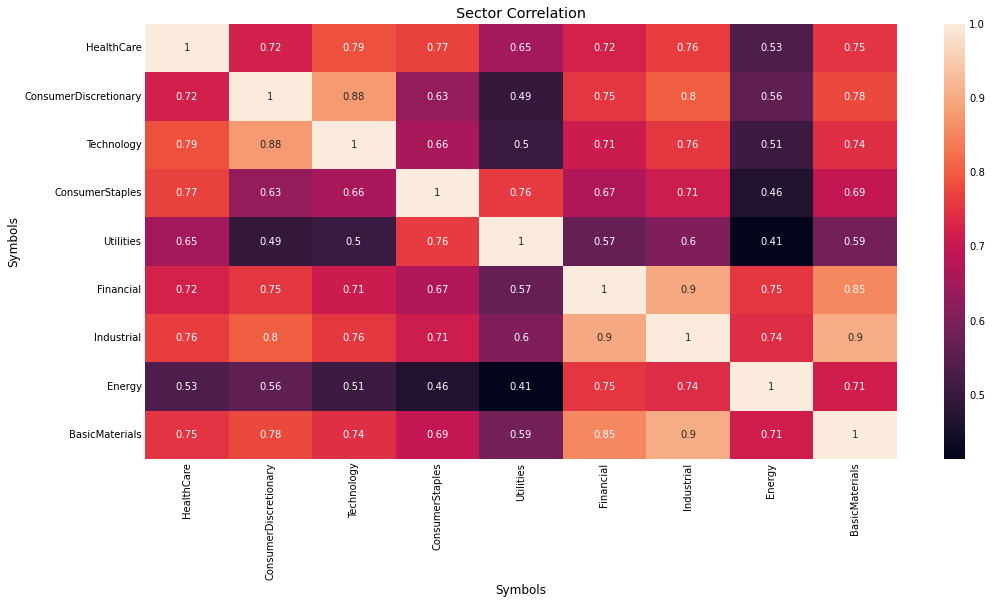

In [5]:
# calculate the correlation matrix
corr = daily_returns.corr()

# plot the heatmap
plt.figure(figsize=(15,8))
sns.heatmap(corr, annot=True, ).set_title("Sector Correlation")

<AxesSubplot:xlabel='Date'>

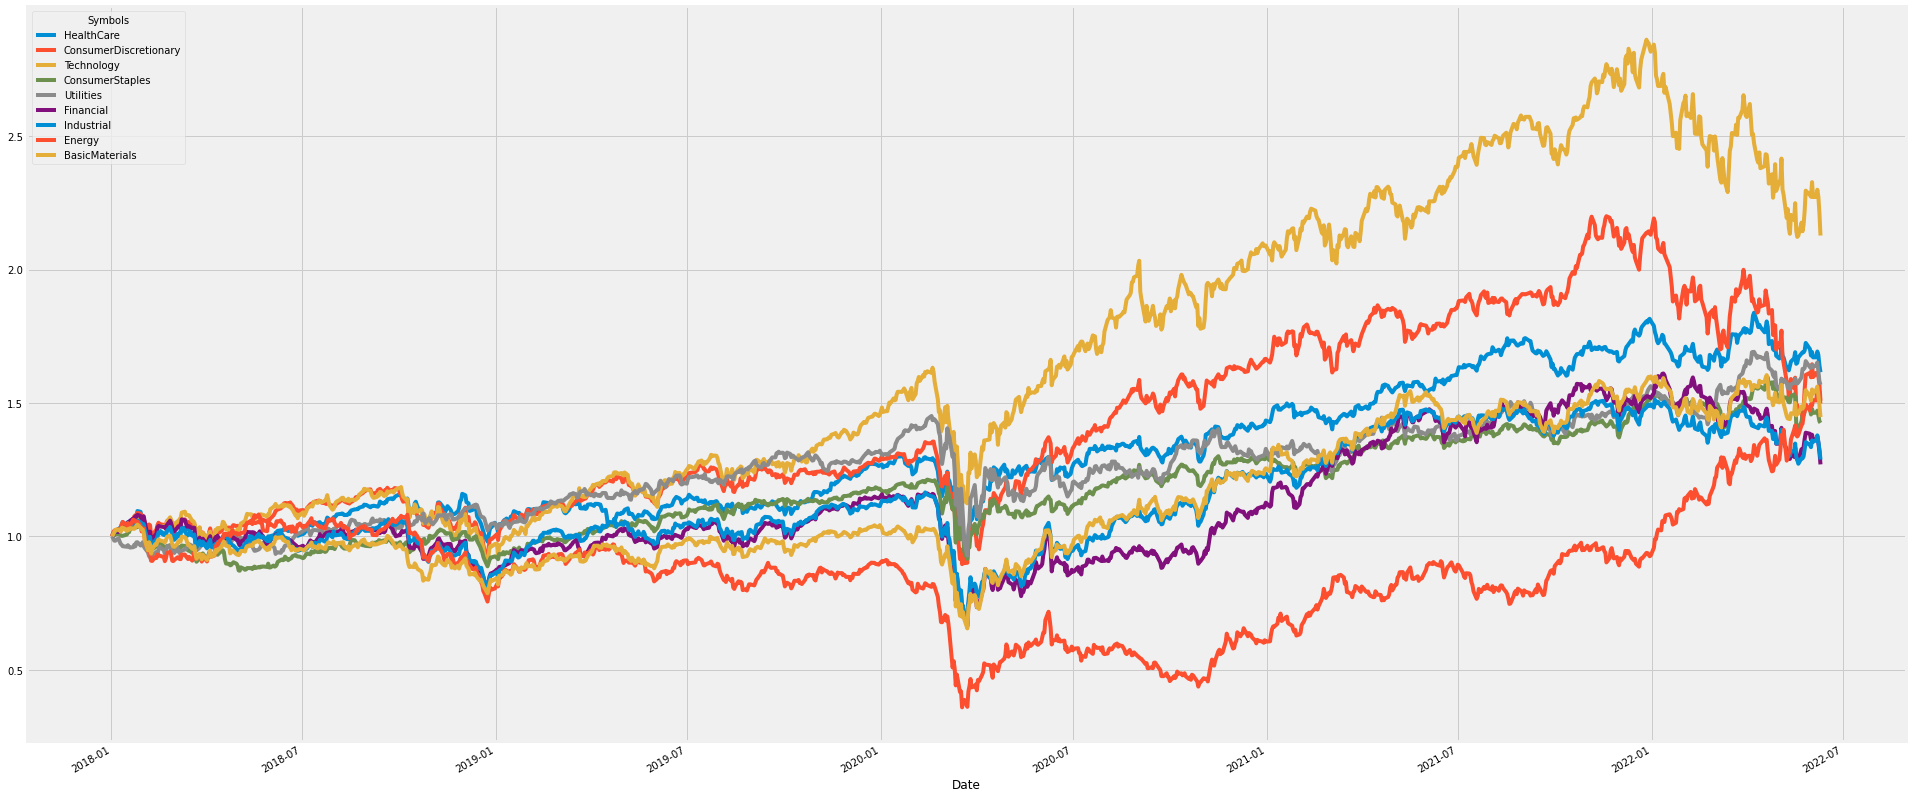

In [6]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

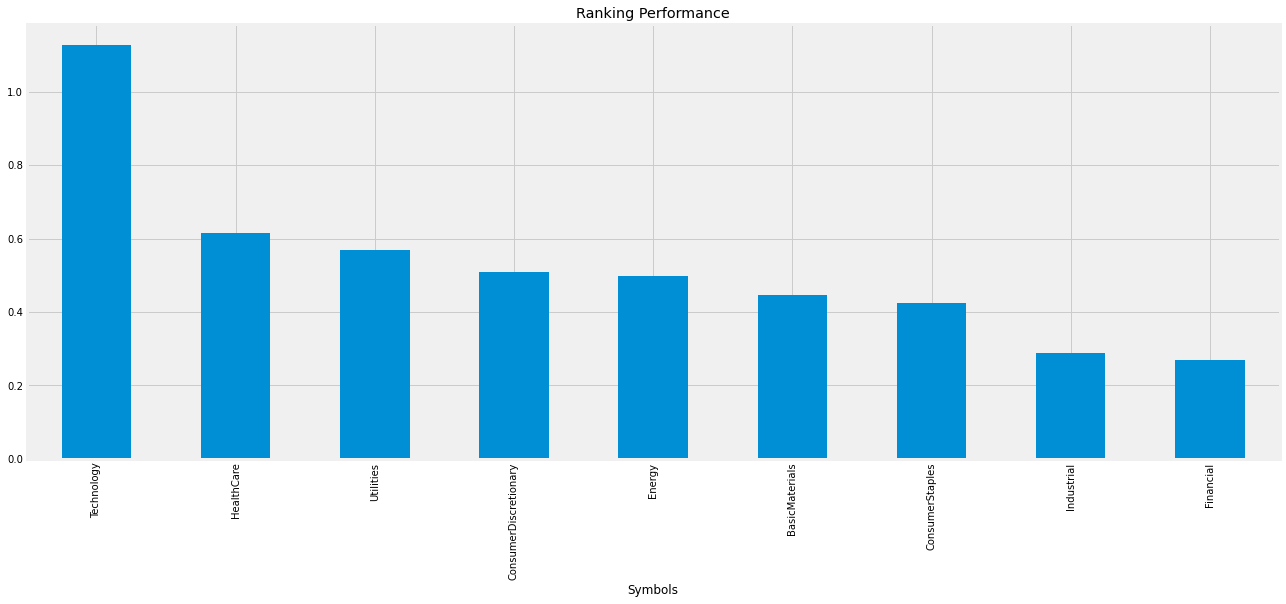

In [7]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [8]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2018/01/01'
end = '2018/12/31'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

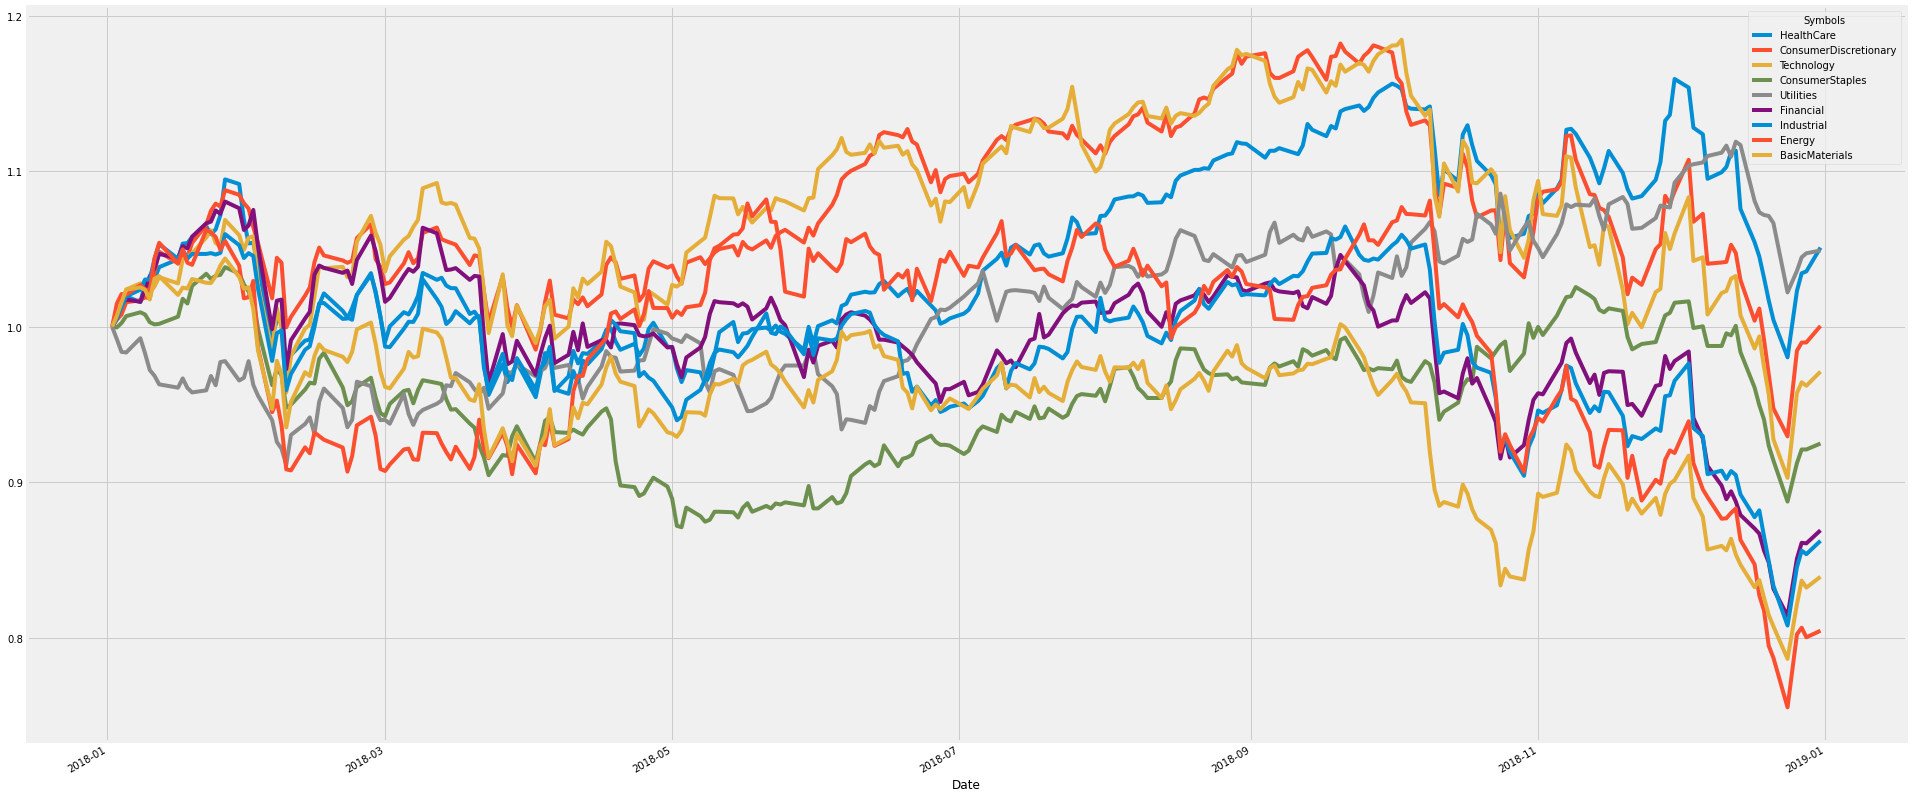

In [9]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

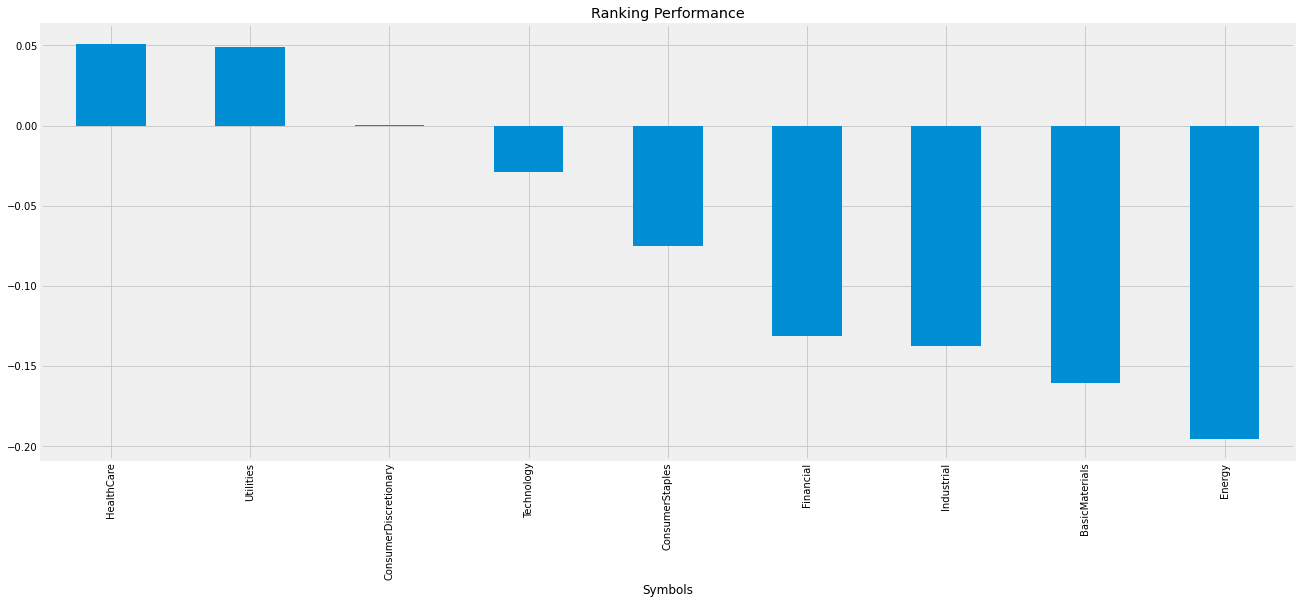

In [10]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [11]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2019/01/01'
end = '2019/12/31'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

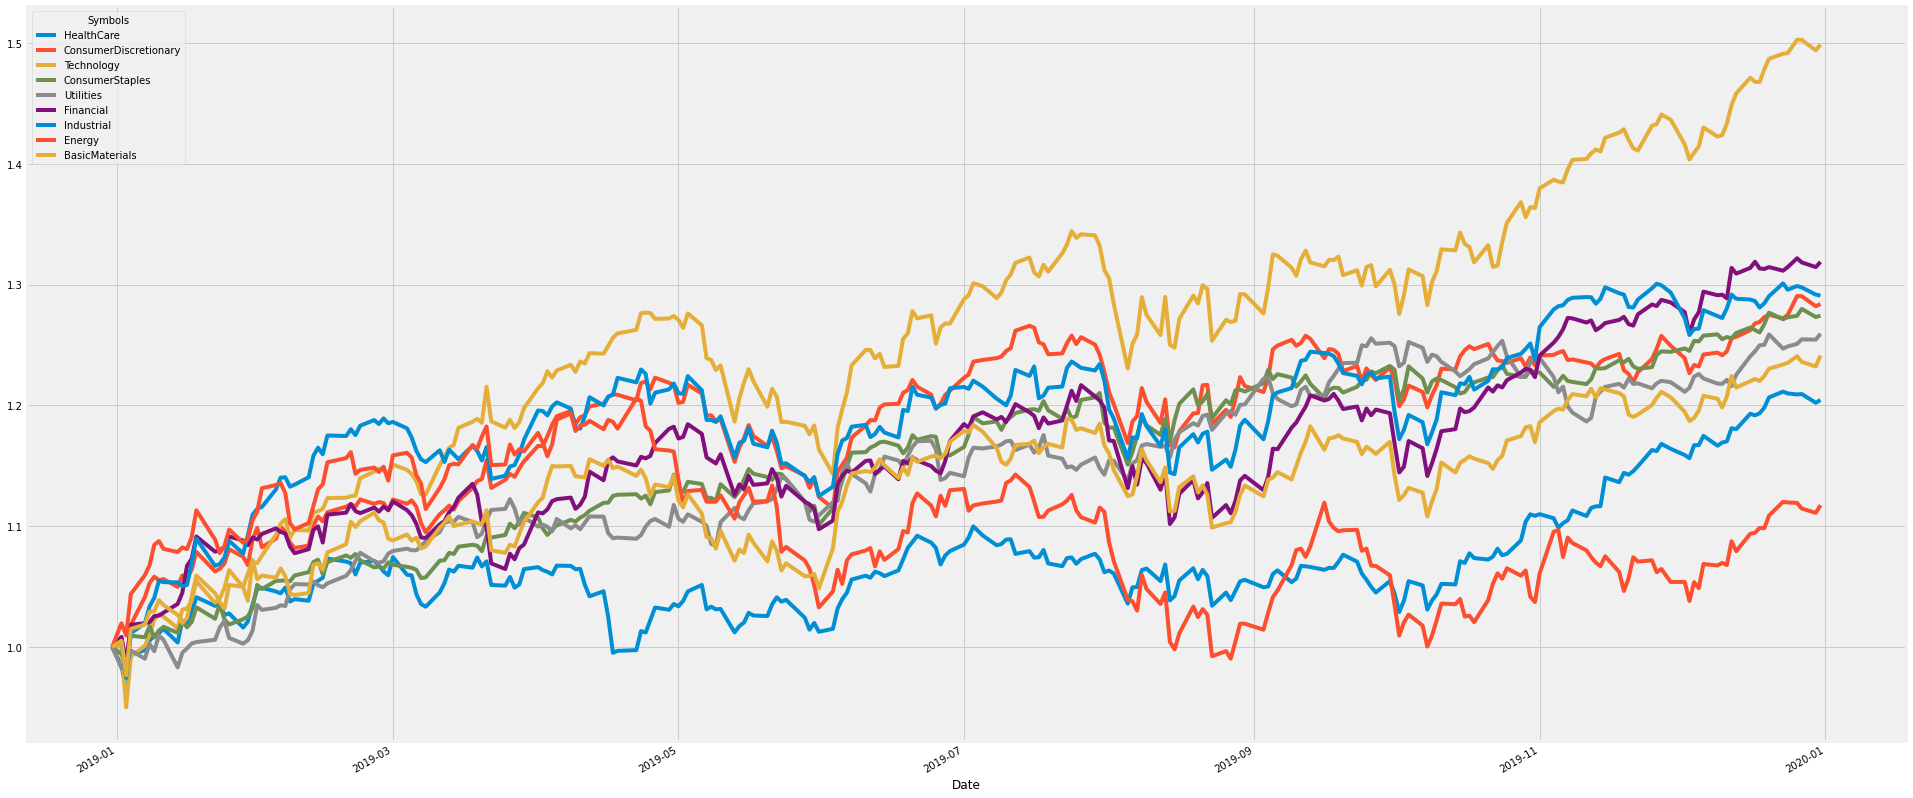

In [12]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

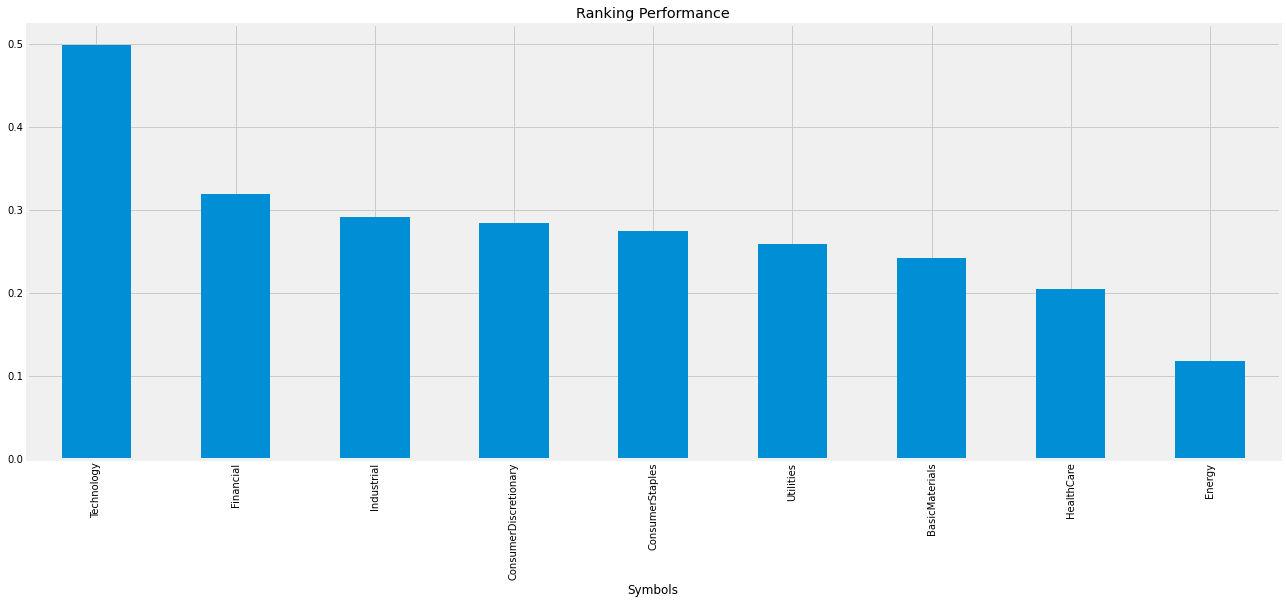

In [13]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [14]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2020/01/01'
end = '2020/12/31'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

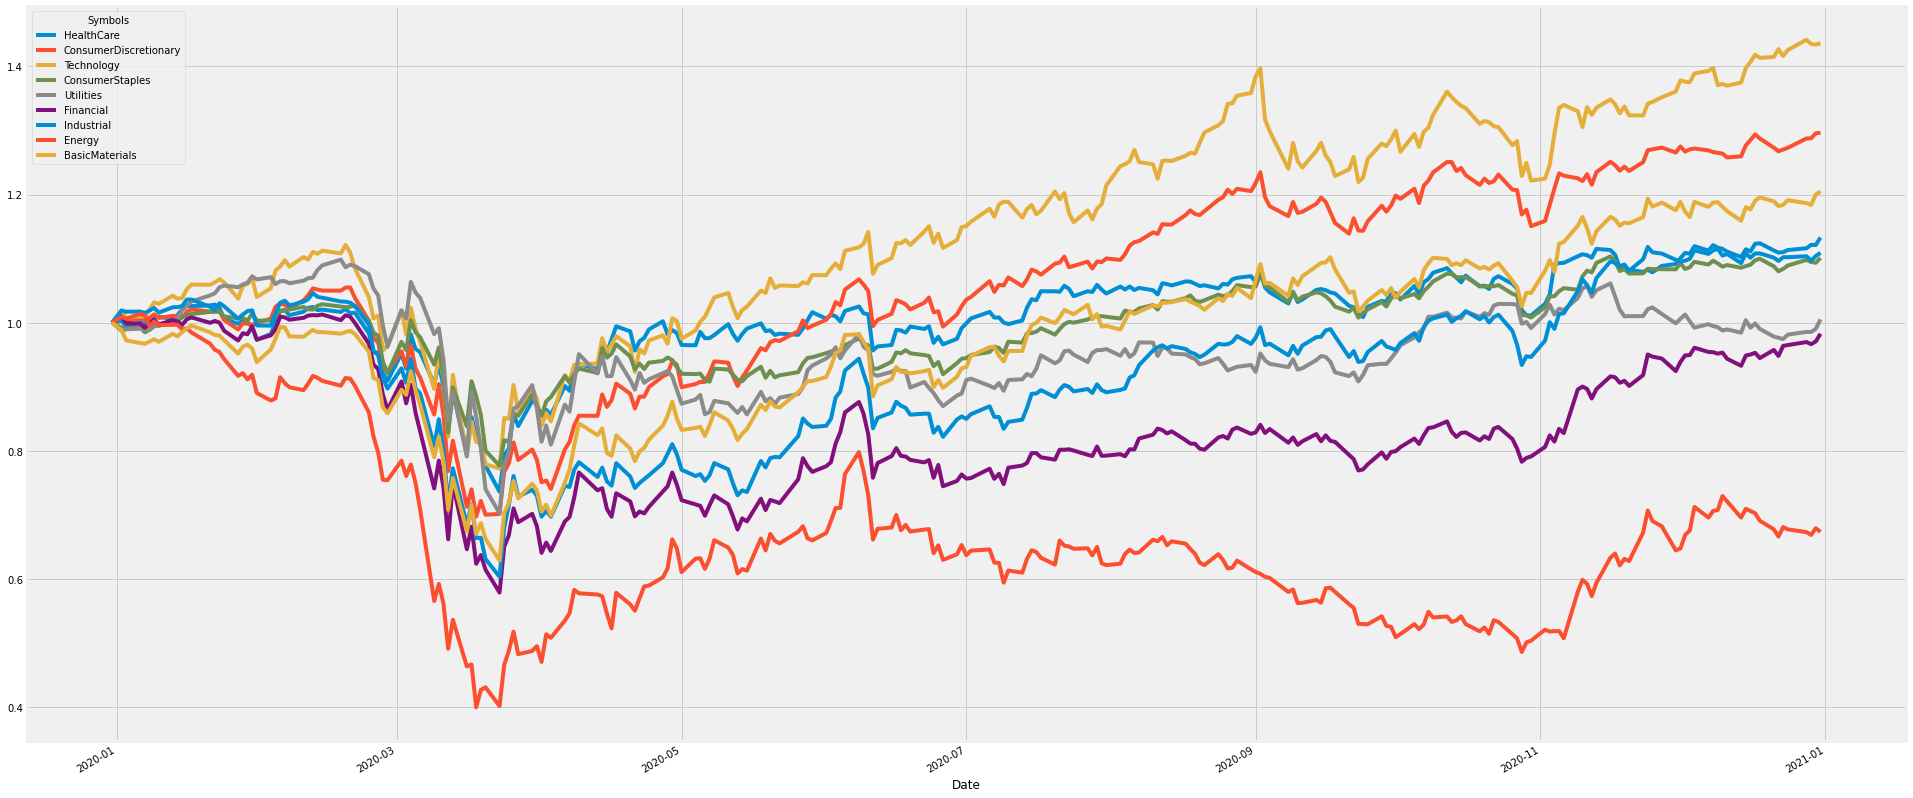

In [15]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

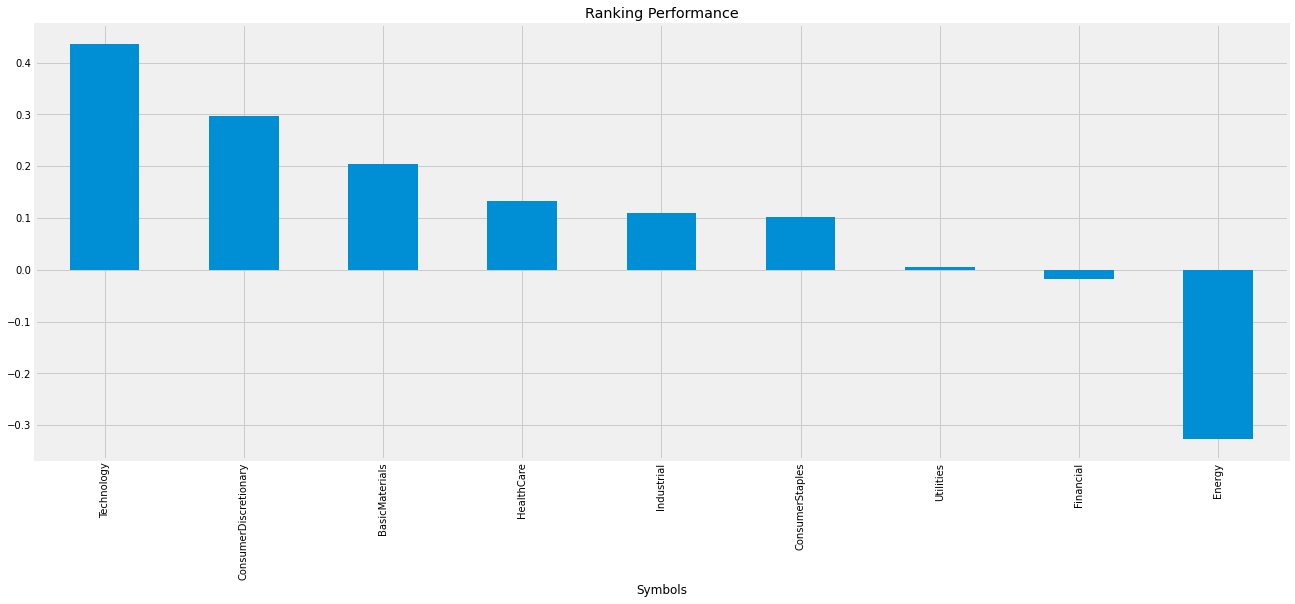

In [16]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [17]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2021/01/01'
end = '2021/12/31'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

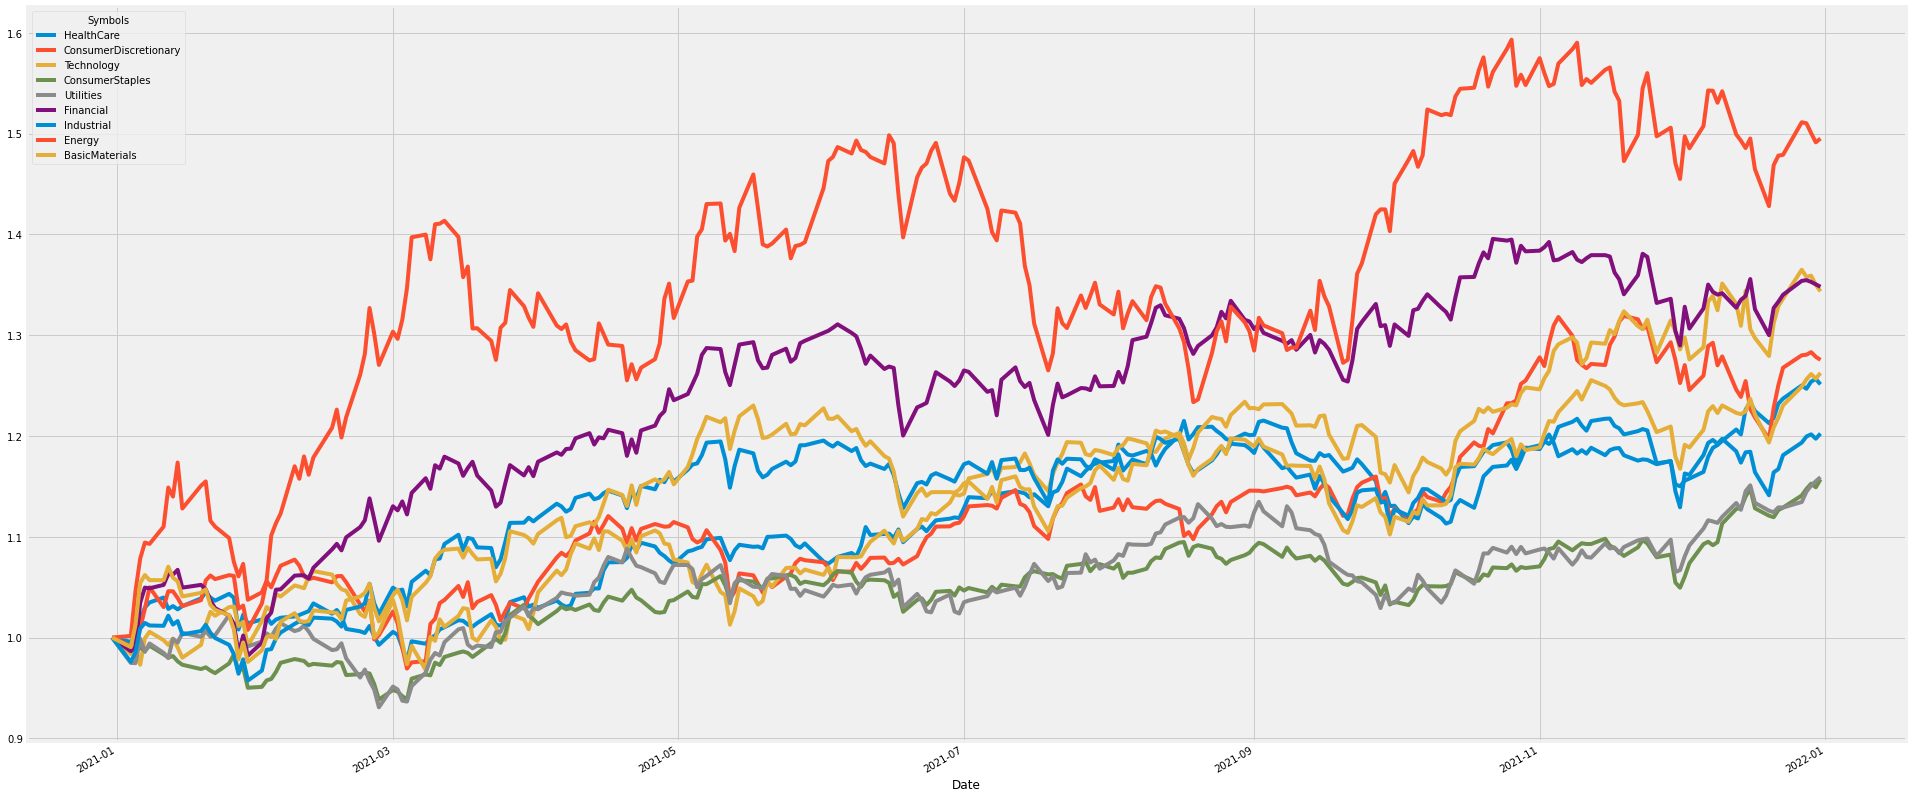

In [18]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

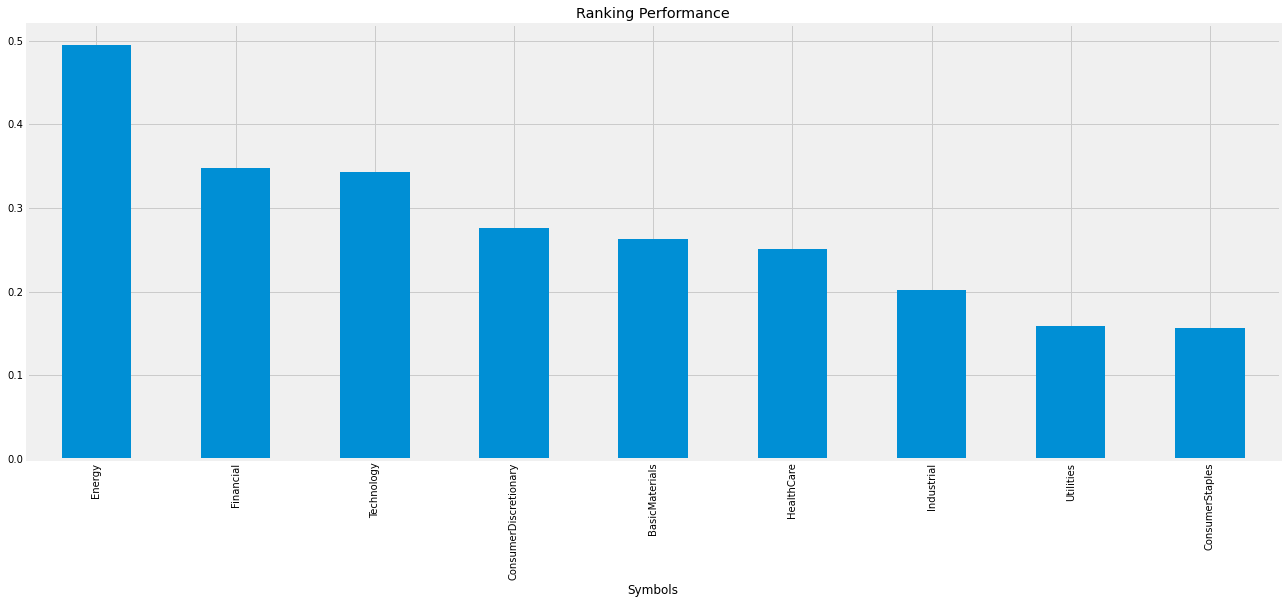

In [19]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")

In [20]:
sector_name = {'xlb':'BasicMaterials', 'xle':'Energy', 'xlf':'Financial', 'xli':'Industrial', 'xlk':'Technology', 'xlp':'ConsumerStaples'
               , 'xlu':'Utilities', 'xlv':'HealthCare', 'xly':'ConsumerDiscretionary'}

Symbol = ['xlv','xly','xlk','xlp','xlu','xlf','xli','xle','xlb'] 


start = '2022/01/01'
end = '2022/06/11'

Price = web.get_data_yahoo(Symbol,start=start,end=end)

Price = Price['Adj Close'].rename(sector_name, axis='columns')
daily_returns = Price.pct_change().dropna()

<AxesSubplot:xlabel='Date'>

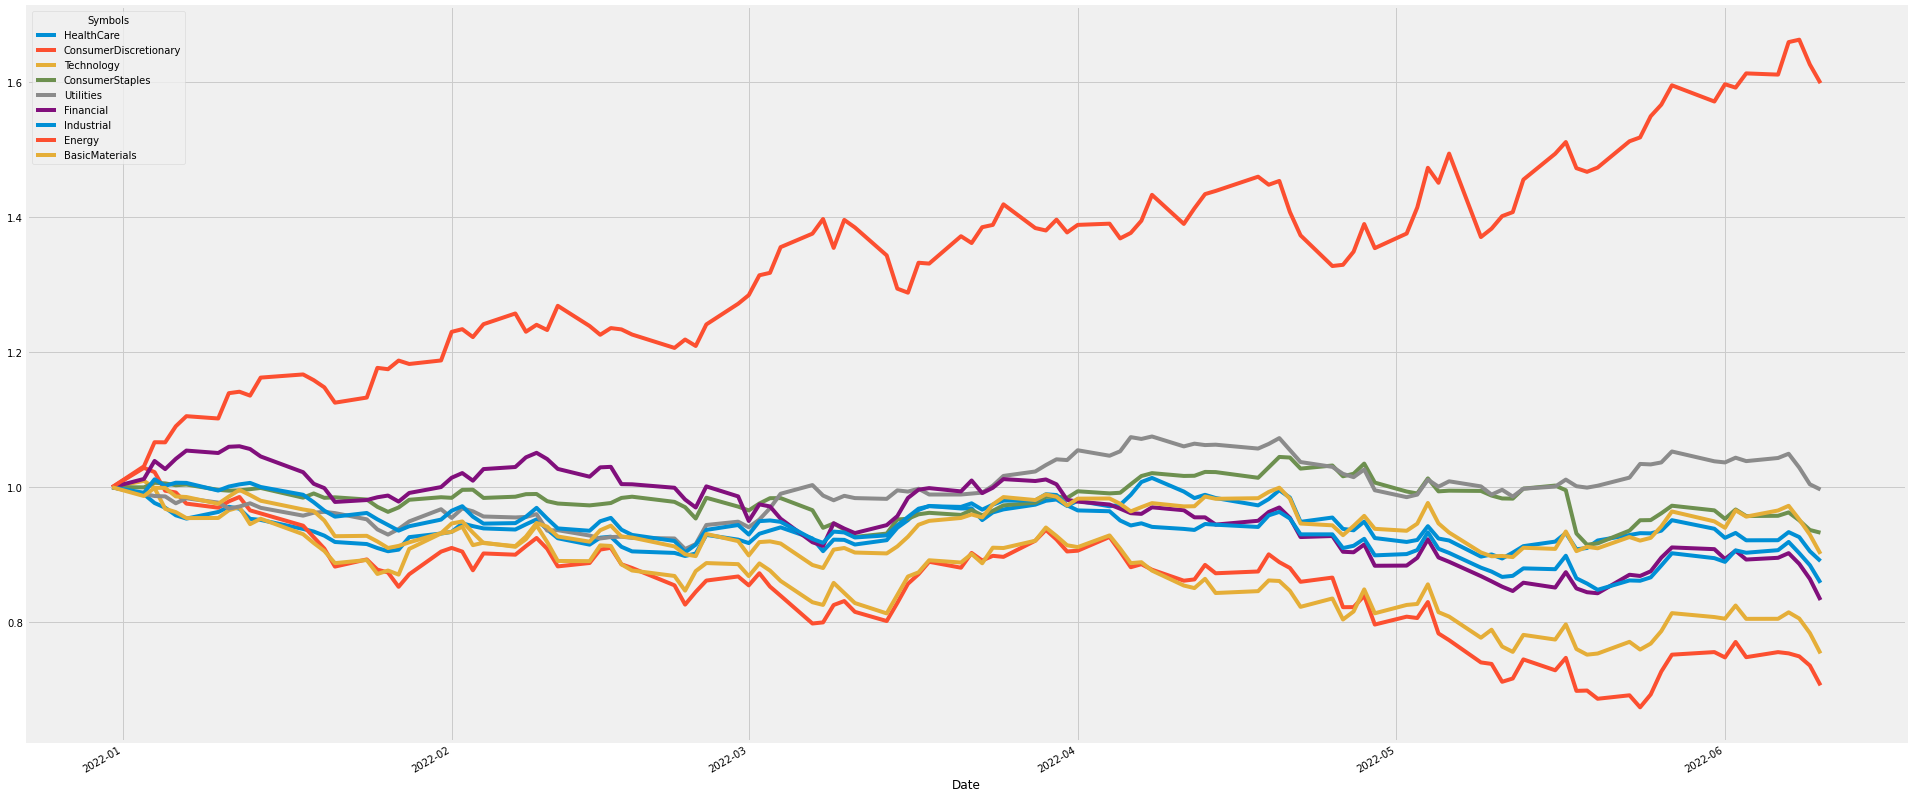

In [21]:
etf_return = Price.apply(lambda x: x / x[0])
etf_return.dropna().plot(figsize=(30,15))

Text(0.5, 1.0, 'Ranking Performance')

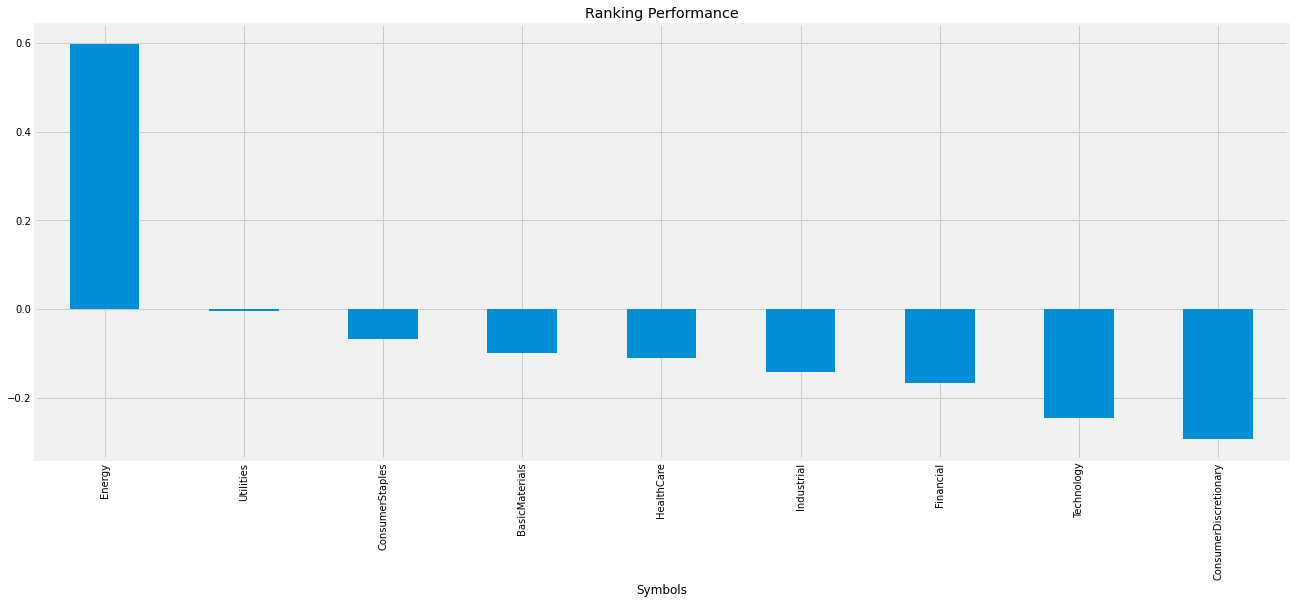

In [22]:
# calculate the correlation matrix
#ผลตอบแทนแต่ละ sector ถึงปัจจุบัน
return_rank = etf_return.iloc[-1].sort_values(ascending = False)-1
return_rank.plot.bar(figsize=(20,8)).set_title("Ranking Performance")